<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [0]:
import numpy as np
from sklearn.datasets import make_regression
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

Breaking The gradient descent algorithm into its functional parts:

1. Hypothesis: The best prediction of the target in each iteration.

2. Loss Function: The difference between the predicted values (hypothesis) and the target values (actual values).

3. Gradient: Finds direction of greatest descent.

4. Theta: Vector of weights (one for each feature), which are updated using the gradient and learning rate in each iteration.

# **Starting parameters**



### **x, y** (Make Dataset)
This dataset has 100 observations, 2 features (both informative), and a target.   Noise was added to make the task challenging, and random state was set to make this reproducible.  However, bias was left out for simplicity.

X and y are features and target, respectively.  The third unpacked variable (coef) is a vector of the actual wieghts that generated the data.

In [0]:
x, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=0, noise=2.5, coef=True, random_state=55)

### Visualize Data

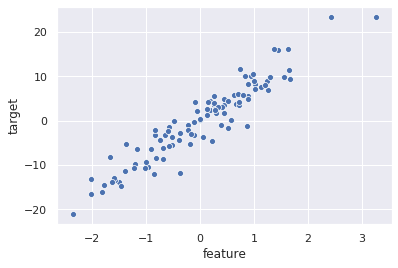

In [550]:
x_plot = pd.DataFrame(x, columns=['feature'])
x_plot['target'] = y
ax = sns.scatterplot(x="feature", y="target", data=x_plot)

### **Alpha** (α): learning-rate, which controls to amount theta (wieghts) change in each iteration.


In [0]:
alpha = 0.0005

### **Iterations**: how many iterations to continue minimizing loss

In [0]:
num_iters = 10000

### **m**: Number of observations in dataset,  **n**: Number of features in dataset 

In [0]:
m, n = np.shape(x)


### **Theta**: Vector of length n, sets intial wieghts (guessed to start), often times initialized as all ones.

In [0]:
theta = np.ones(n)

# **Functions**

### **Hypothesis Function**

This function returns the best prediction of the target in each iteration.  It comes in the form of a matrix of equal size to y (target vector).

In [0]:
def hyp_fun(x, theta):
    hypothesis = np.dot(x, theta)
    return hypothesis

### **Loss Function**

This function returns the difference between the best prediction in a given iteration and the actual values.  It comes in the form of a matrix of equal size to y (target vector).





In [0]:
def loss_fun(hypothesis, y):
    loss = hypothesis - y
    return loss

### **Gradient Function**

This function returns the dot product of the feature vector x (transposed) and loss.  It comes in the form of a vector equal in length to the number of parameters (weights).

In [0]:
def grad_fun(xTranspose, loss, m):
    gradient = np.dot(xTranspose, loss) / m   
    return gradient

### **Theta Function**
This function returns the previous theta value minus the preset alpha value times the current gradient value.  It also comes in the form of a vector equal in length to the number of parameters (weights).

In [0]:
def theta_fun(theta, alpha, gradient):
    theta = theta - alpha * gradient
    return theta

### **Cost Function (MSE)**
The loss function described earlier will be used to minimize loss iteratively.  This cost function will be used as a measure of how well the minimization effort went, and how "good" the model is after training.

In [0]:
def cost_fun(loss, m):
    cost = np.sum(loss ** 2) / (2 * m)
    return cost

### **Gradient Descent Function**

In [0]:
def gradientDescent(x, y, m, alpha, theta, num_iters):
    xTranspose = x.transpose()
    # Keep track of cost as its minimized to visualize later
    cost_history = []
    iters = []
    for i in range(0, num_iters):
        hypothesis = hyp_fun(x, theta)
        loss = loss_fun(hypothesis, y)
        gradient = grad_fun(xTranspose, loss, m)
        theta = theta_fun(theta, alpha, gradient)
        cost = cost_fun(loss, m)
        cost_history.append(cost)
        iters.append(i)
    return theta, cost, cost_history, iters

In [0]:
theta, cost, cost_history, iters = gradientDescent(x, y, m, alpha, theta, num_iters)

### **Compare Estimated Weights to the Actual Weights**

In [562]:
print(f"Actual Weights: {coef}")
print(f"Estimated Weights: {theta[0]}")
print(f"Cost(MSE): {cost}")

Actual Weights: 7.646551867205353
Estimated Weights: 7.9004946819342505
Cost(MSE): 4.014097305610209


# **Plot Results**

### **Fit Line with Coefficients**

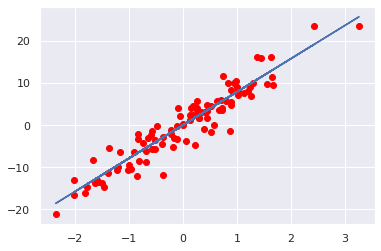

In [563]:
# Get values
feature = x_plot.iloc[:,0]
target = x_plot.iloc[:,1]
spargs = {'x': feature, 'y': target, 'color': 'red'} 

# Get coeficients (create line)
y = x_plot.iloc[:, 0]
X = x_plot.iloc[:, 0]
p = theta
coef = p[0]
line = coef * X

# Create scatter plot with line and show
plt.scatter(**spargs)
plt.plot(X, line, 'b')
plt.grid(True)
plt.show()

### **Plot Cost against Iterations**

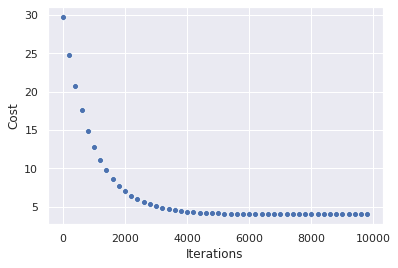

In [564]:
cost_plot = pd.DataFrame(iters[0::200], columns=['Iterations'])
cost_plot['Cost'] = cost_history[0::200]
ax = sns.scatterplot(x="Iterations", y="Cost", data=cost_plot)